Introduction: This project analyzes data from the online dating app, OK Cupid.  Online dating has exploded in popularity over the recent years, and many dating apps have been created to help people make good connections with people they may otherwise never have gotten to meet. Sophisticated algorithms are used to make recommendations based on a number of factors, from personal interests to age, height, etc.  These apps provide us with a treasure trove of information from which we make meaningful insights about how people experience romance.

The goal of this portfolio project is to scope, prep, analyze, and create a machine learning model to solve a question.
Datasource: profiles.csv provided by Codecademy.com


Scoping:  I will keep the project contained to four areas. Project goals, to define high-level objectives and set overall intentions of the project. Data, I will keep contained to the provided dataset.  Analysis, which I will have to come up with solutions as I work with the data and stick to my project goals. And evaluation, where I draw conclusions from my findings.

Project goals - Matching astrological signs is a popular method for many online daters.  However, there are a number of profiles that don't list an astrological sign.  This being the case, I am going to see if I can build a machine learning model which predicts astrological signs based on other inputed data so we can make matches with users who put a lot of importance in astrological matches.

Data - I will be using the dataset profiles.csv provided by Codecademy.com which provides some basic details about a user, and self-answered short essay prompts.

Analysis - I will use a combination of descriptive statistics and data visualizations to draw meaningful insights about the data.  And since the goal of this project is to predict astrological signs, I will use supervised machine learning algorithms to implement a predictive model.

Evaluation - The project will conclude with an evaluation of the model with a validation set.  I will display the performance of the predictions using a confusion matrix, and metrics such as accuracy, precision, recall and F1 scores.

In [5]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

In [7]:
profiles = pd.read_csv('profiles.csv')
profiles.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


Now we will check all of the features along with their datatypes, to get an idea of what we should explore further.

In [13]:
profiles.dtypes

age              int64
body_type       object
diet            object
drinks          object
drugs           object
education       object
essay0          object
essay1          object
essay2          object
essay3          object
essay4          object
essay5          object
essay6          object
essay7          object
essay8          object
essay9          object
ethnicity       object
height         float64
income           int64
job             object
last_online     object
location        object
offspring       object
orientation     object
pets            object
religion        object
sex             object
sign            object
smokes          object
speaks          object
status          object
dtype: object

In [15]:
profiles.last_online.head()

0    2012-06-28-20-30
1    2012-06-29-21-41
2    2012-06-27-09-10
3    2012-06-28-14-22
4    2012-06-27-21-26
Name: last_online, dtype: object

In [17]:
profiles.count()

age            59946
body_type      54650
diet           35551
drinks         56961
drugs          45866
education      53318
essay0         54458
essay1         52374
essay2         50308
essay3         48470
essay4         49409
essay5         49096
essay6         46175
essay7         47495
essay8         40721
essay9         47343
ethnicity      54266
height         59943
income         59946
job            51748
last_online    59946
location       59946
offspring      24385
orientation    59946
pets           40025
religion       39720
sex            59946
sign           48890
smokes         54434
speaks         59896
status         59946
dtype: int64

There are 59,946 rows of entries in this dataset, with 31 features.  10 features are short form answers, ie 'essay0'. The rest are personal details, like age, sex, and body_type.  48,890 have a zodiac sign listed, which means 11,056 have left the zodiac sign blank.  We should be able to build a machine learning model off of the majority of rows in order to predict the missing zodiac signs.

In [24]:
print('number of categories: ', profiles.sign.nunique())
print('categories: ', profiles.sign.unique())

number of categories:  48
categories:  ['gemini' 'cancer' 'pisces but it doesn&rsquo;t matter' 'pisces'
 'aquarius' 'taurus' 'virgo' 'sagittarius'
 'gemini but it doesn&rsquo;t matter' 'cancer but it doesn&rsquo;t matter'
 'leo but it doesn&rsquo;t matter' nan
 'aquarius but it doesn&rsquo;t matter'
 'aries and it&rsquo;s fun to think about'
 'libra but it doesn&rsquo;t matter'
 'pisces and it&rsquo;s fun to think about' 'libra'
 'taurus but it doesn&rsquo;t matter'
 'sagittarius but it doesn&rsquo;t matter' 'scorpio and it matters a lot'
 'gemini and it&rsquo;s fun to think about'
 'leo and it&rsquo;s fun to think about'
 'cancer and it&rsquo;s fun to think about'
 'libra and it&rsquo;s fun to think about'
 'aquarius and it&rsquo;s fun to think about'
 'virgo but it doesn&rsquo;t matter'
 'scorpio and it&rsquo;s fun to think about'
 'capricorn but it doesn&rsquo;t matter' 'scorpio'
 'capricorn and it&rsquo;s fun to think about' 'leo'
 'aries but it doesn&rsquo;t matter' 'aries'
 'scor

The dataset looks to have 48 categories of signs, but there should only be 12.  We will need to clean the data and remove any discrepancies.

In [29]:
profiles['signsCleaned']=profiles.sign.str.split().str.get(0)
print('number of categories: ', profiles.signsCleaned.nunique())
print('categories: ', profiles.signsCleaned.unique())

profiles.signsCleaned.value_counts()

number of categories:  12
categories:  ['gemini' 'cancer' 'pisces' 'aquarius' 'taurus' 'virgo' 'sagittarius'
 'leo' nan 'aries' 'libra' 'scorpio' 'capricorn']


signsCleaned
leo            4374
gemini         4310
libra          4207
cancer         4206
virgo          4141
taurus         4140
scorpio        4134
aries          3989
pisces         3946
sagittarius    3942
aquarius       3928
capricorn      3573
Name: count, dtype: int64

This histogram shows that most users are in the late 20's to early 30's age range.

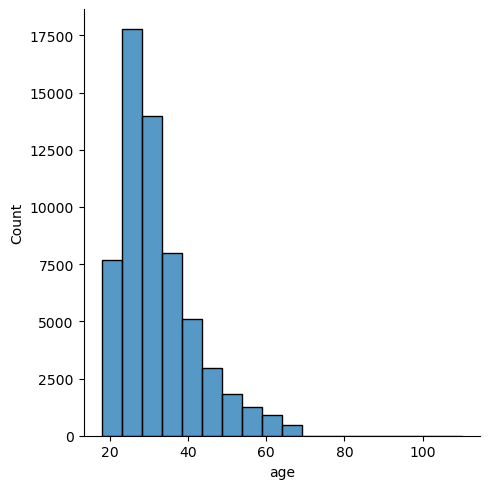

In [31]:
sns.displot(data=profiles, x='age', kind='hist', binwidth=5)

The following histogram is the same distribution, but separated into genders.

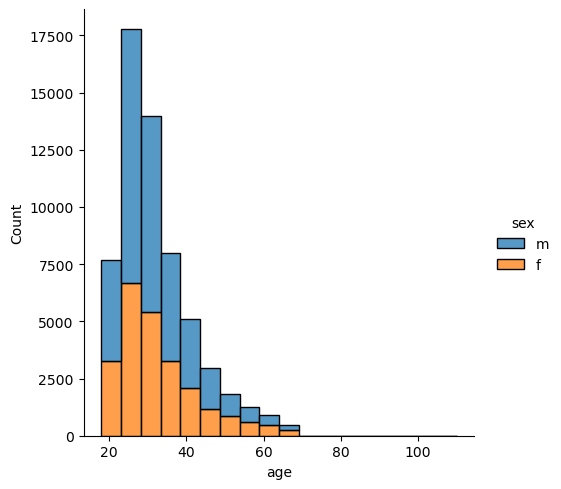

In [34]:
sns.displot(data=profiles, x='age', hue='sex', kind='hist', binwidth=5, multiple='stack')